# **LENDING CLUB**: **EDA**


#IGNORE WARNINGS


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# IMORTING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# IMPORTING THE DATA SET


In [ ]:
#Importing the dataset "loan.csv"
df = pd.read_csv('loan.csv')

#Shows the first 5 records
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# DESCRIBING THE DATASET

In [ ]:
#Shape of the Data-Set
r,c = df.shape
print(f'This dataset consists of {r} rows and {c} columns')


This dataset consists of 39717 rows and 111 columns


In [ ]:
#Number of categorical and numerical features
num, ob = 0,0
for f in df.columns:
    if df.dtypes[f] != 'O':
        num += 1
    else:
        ob += 1
print(f'There are {num} numerical features and {ob} categorical features.')

There are 87 numerical features and 24 categorical features.


TARGET VALUES

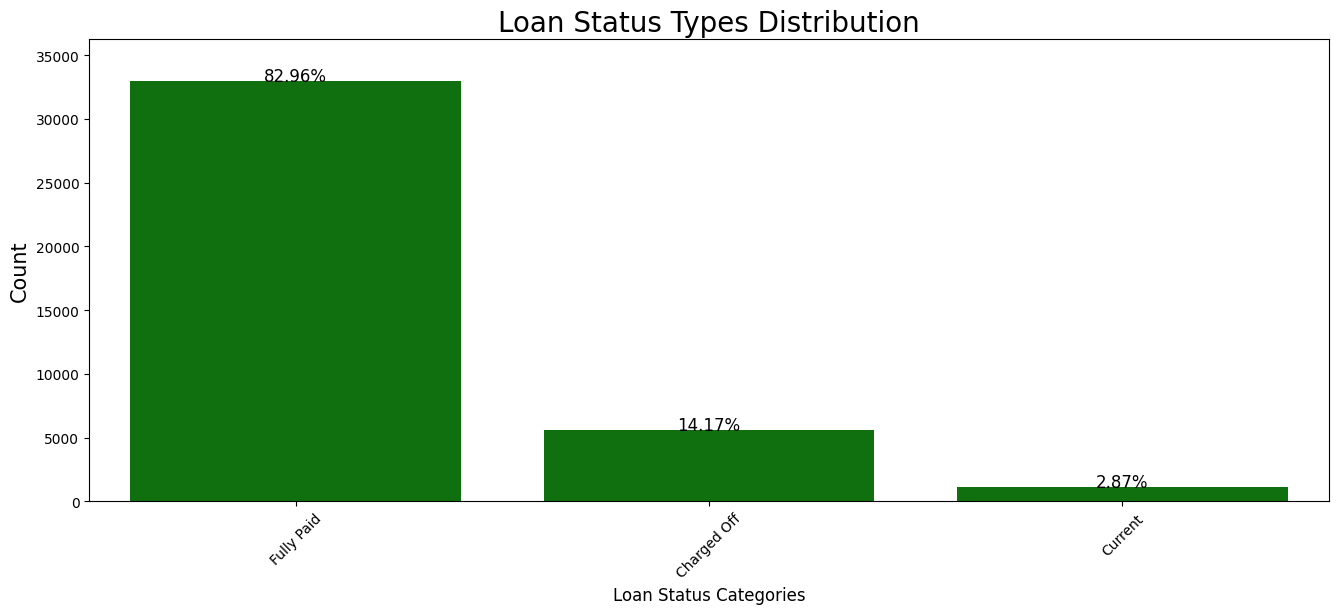

In [ ]:
total = len(df)

plt.figure(figsize = (16,6))
sns.reset_defaults()
g = sns.countplot(x="loan_status", data=df,
                  color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12)
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

Observation: We can see in the dataset that 82.96% are fully paid, 14.17% are charged off and 2.87% are current.

-> The feature "current" will be removed as it wont contribute to further analysis.


# DATA CLEANING


REMOVAL OF THE FEATURE "current"

In [ ]:
# Removing attribute value "Current"
df = df[df['loan_status'] != 'Current']
# Unique count after feature value removal:
print('\nUnique count after removal: ')
print(np.round((df.loan_status.value_counts()*100)/len(df),2))


Unique count after removal: 
Fully Paid     85.41
Charged Off    14.59
Name: loan_status, dtype: float64


LOOKING FOR DUPLICATES IN THE DATA-SET


In [ ]:
#Checking for duplicates
row, column = df[df.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


FINDING FEATURES TO REMOVE

In [ ]:
mr30_lst = []  # List to store feature with more than 30% missing value

for feature in df:
    if (df[feature].isnull().mean()*100) > 30.0:
        mr30_lst.append(feature)

print(f'There are {len(mr30_lst)} features that has more than 30% missing value.')

ucat_lst = [] #list to store categorical feature with one unique value

for feature in df:
    if df[feature].dtype == 'O' and feature != 'loan_status':
        if len(df[feature].unique())==1:
            ucat_lst.append(feature)

print(f'{ucat_lst} - are categorical features with one unique value')

unum_lst = [] #list to store unique numerical features

for feature in df:
    if df[feature].dtype != 'O' and len(df[feature].unique())==1 :
        if df[feature].isnull().all(axis=0) :
            continue
        else:
            unum_lst.append(feature)

print(f'{unum_lst} - are numerical features with one unique value and not NaN')


There are 58 features that has more than 30% missing value.
['pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type'] - are categorical features with one unique value
['out_prncp', 'out_prncp_inv', 'policy_code', 'acc_now_delinq', 'delinq_amnt'] - are numerical features with one unique value and not NaN


OBSERVATIONS FROM THE DATA DICTIONARY


Since we are finding the factors pre-approval of a loan that leads to customer to default , we have identified few features which can be removed for further analysis as these features are dervied **after loan approval.**

REMOVING THE IDENTIFIED FEATURES

In [ ]:
from itertools import chain
del_lst = list(chain(mr30_lst,ucat_lst,
                         unum_lst))
# Removing the list features
for feature in df.columns:
    if feature in del_lst:
        del df[feature]

lst = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d',
        'total_rec_late_fee', 'chargeoff_within_12_mths', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal',
        'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee',
        'last_pymnt_amnt','recoveries', 'collections_12_mths_ex_med', 'tax_liens','earliest_cr_line', 'addr_state']  # 21 identified features from the data dictionary to be removed

for feature in df.columns:
    if feature in lst:
        del df[feature]

print("The columns after removing the features are:")
df.columns



The columns after removing the features are:


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'total_pymnt_inv', 'pub_rec_bankruptcies'],
      dtype='object')

# UNIVARIATE ANALYSIS


UNIVARIATE ANALYSIS ON ANNUAL INCOME

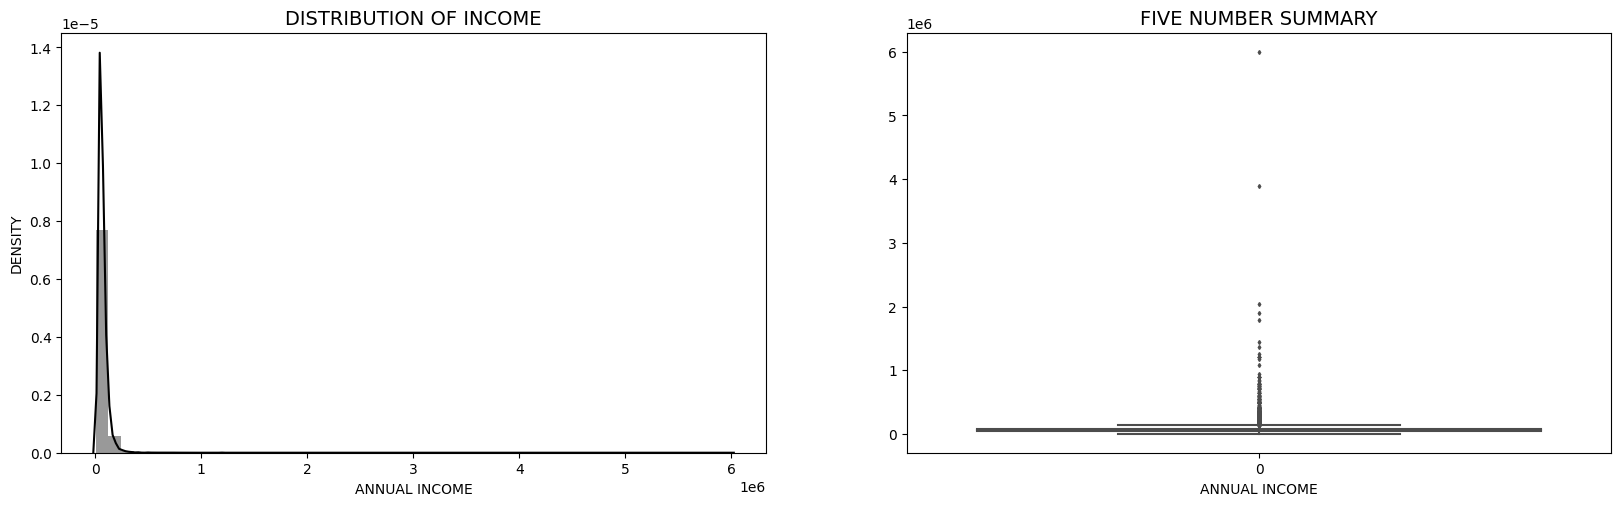



Numerical Summary: 


Mean: 68777.97368120901
Median: 58868.0
90% Data 115000.0
99% Data: 234143.99999999878
100% Data: 6000000.0


In [ ]:
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(df['annual_inc'], color='black')
viz.set_title('DISTRIBUTION OF INCOME',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(df['annual_inc'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black')
plt.show()
print('\n')

# Numerical summary
print('Numerical Summary: ')
print('\n')
print('Mean:', df['annual_inc'].mean())
print('Median:', df['annual_inc'].quantile(0.5))
print('90% Data', df['annual_inc'].quantile(0.9))
print('99% Data:', df['annual_inc'].quantile(0.99))
print('100% Data:', df['annual_inc'].quantile(1))

UNIVARIATE ANALYSIS ON HOME OWNERSHIP

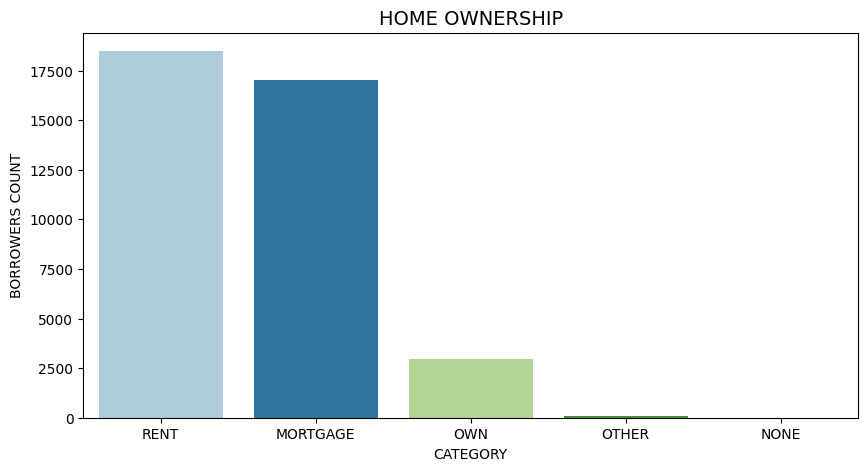

In [ ]:
# Countplot for home ownership
plt.figure(figsize=(10,5))
viz = sns.countplot(x= df['home_ownership'],
                    order=df['home_ownership'].value_counts().index,
                    palette= 'Paired')
viz.set_title('HOME OWNERSHIP',fontsize=14,color='black')
viz.set_xlabel('CATEGORY',fontsize =10,color = 'black')
viz.set_ylabel('BORROWERS COUNT',fontsize =10,color = 'black')
plt.show()

UNIVARIATE ANALYSIS ON INTEREST RATE

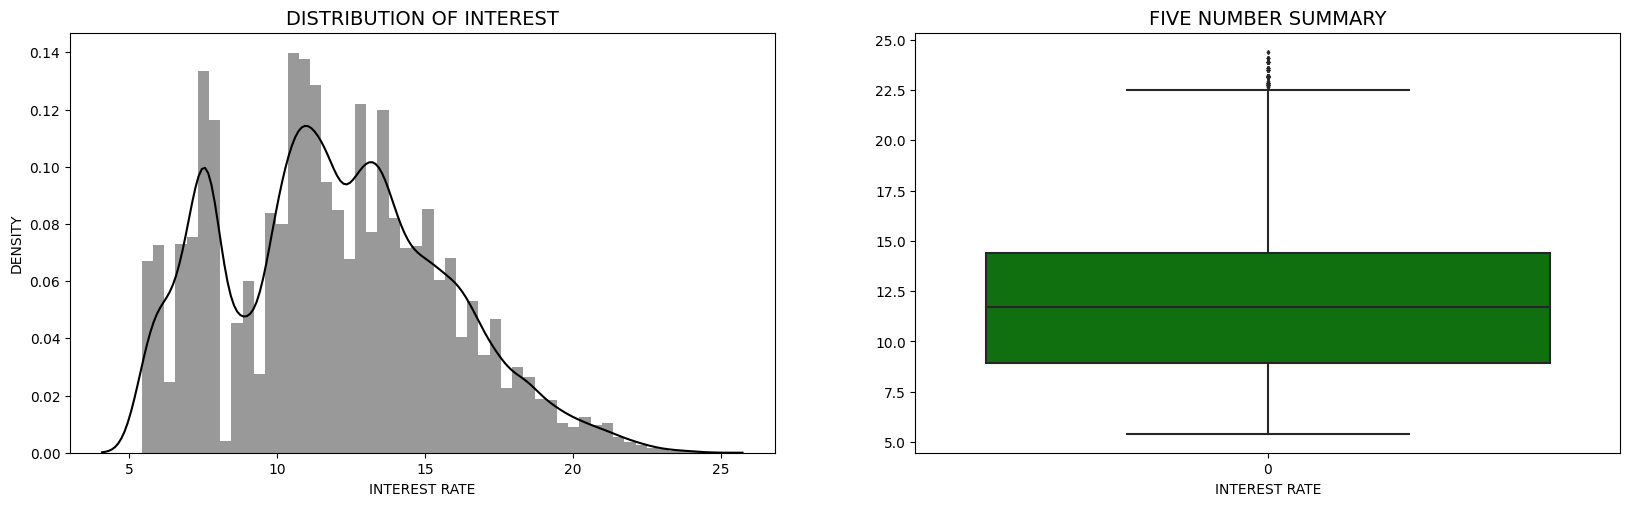



Numerical Summary: 
Average interest rate: 12.0 %
Interest rate @75 percentile: 14.0 %
Interest rate @90 percentile: 17.0 %
Interest rate @99 percentile: 21.0 %


In [ ]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')
df[['int_rate', 'revol_util']] =df[['int_rate', 'revol_util']].apply(pd.to_numeric) #CASTING TO NUMERIC DATA TYPE

# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(df['int_rate'], color='black')
viz.set_title('DISTRIBUTION OF INTEREST',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(df['int_rate'], color='green',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black')
plt.show()
print('\n')

# Numerical summary
print('Numerical Summary: ')
print('Average interest rate:',np.round(df['int_rate'].mean()),'%')
print('Interest rate @75 percentile:',np.round(df['int_rate'].quantile(0.75)),'%')
print('Interest rate @90 percentile:',np.round(df['int_rate'].quantile(0.9)),'%')
print('Interest rate @99 percentile:',np.round(df['int_rate'].quantile(0.99)),'%')

UNIVARIATE ANALYSIS ON LOAN AMOUNT

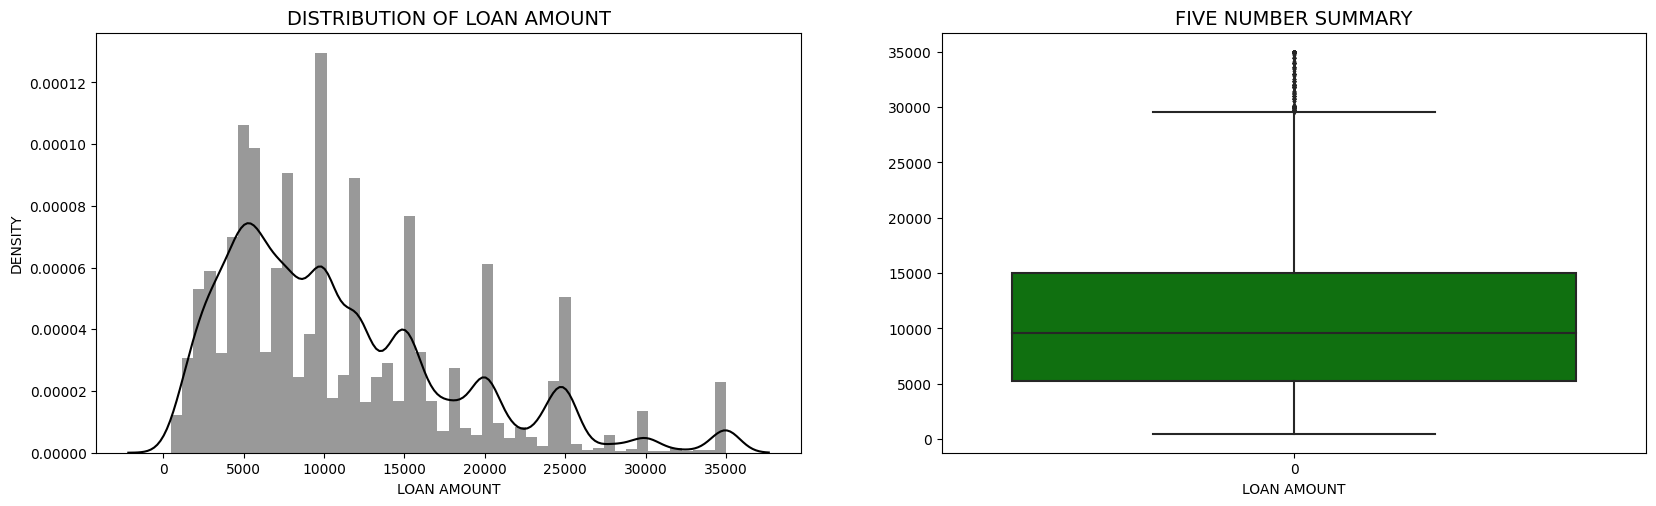

In [ ]:
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(df['loan_amnt'], color='black')
viz.set_title('DISTRIBUTION OF LOAN AMOUNT',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(df['loan_amnt'], color='green',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

LOAN PROVIDED PER YEAR AND TENURE

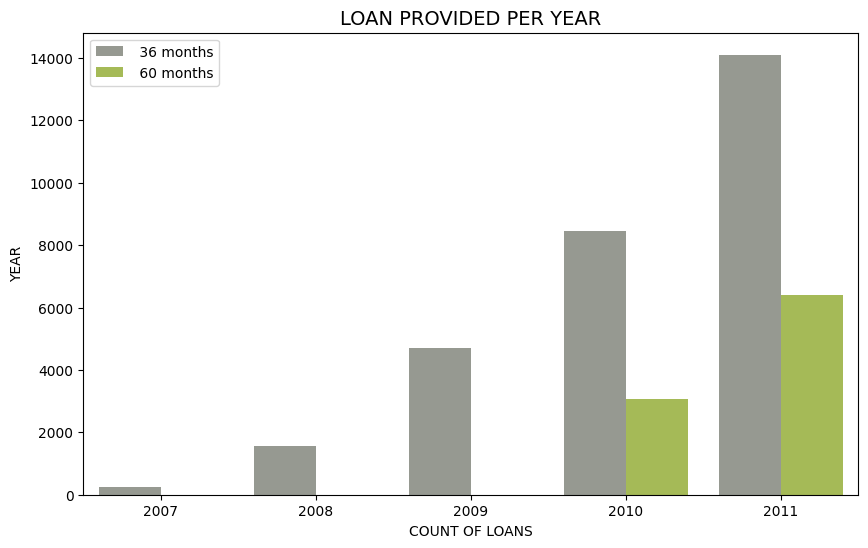

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') #Casting to datetime format
df['issue_year']=df['issue_d'].dt.year #Deriving year
# Creating countplot
plt.figure(figsize=(10,6))
viz = sns.countplot(x = df['issue_year'],
                    hue = df['term'],
                    order=df['issue_year'].value_counts(ascending = True).index,
                    palette=['#979A90', "#AECB46"])
viz.set_title('LOAN PROVIDED PER YEAR',fontsize=14,color='black')
viz.set_ylabel('YEAR',fontsize =10,color = 'black')
viz.set_xlabel('COUNT OF LOANS',fontsize =10,color = 'black')
viz.legend(loc=2)
plt.show()

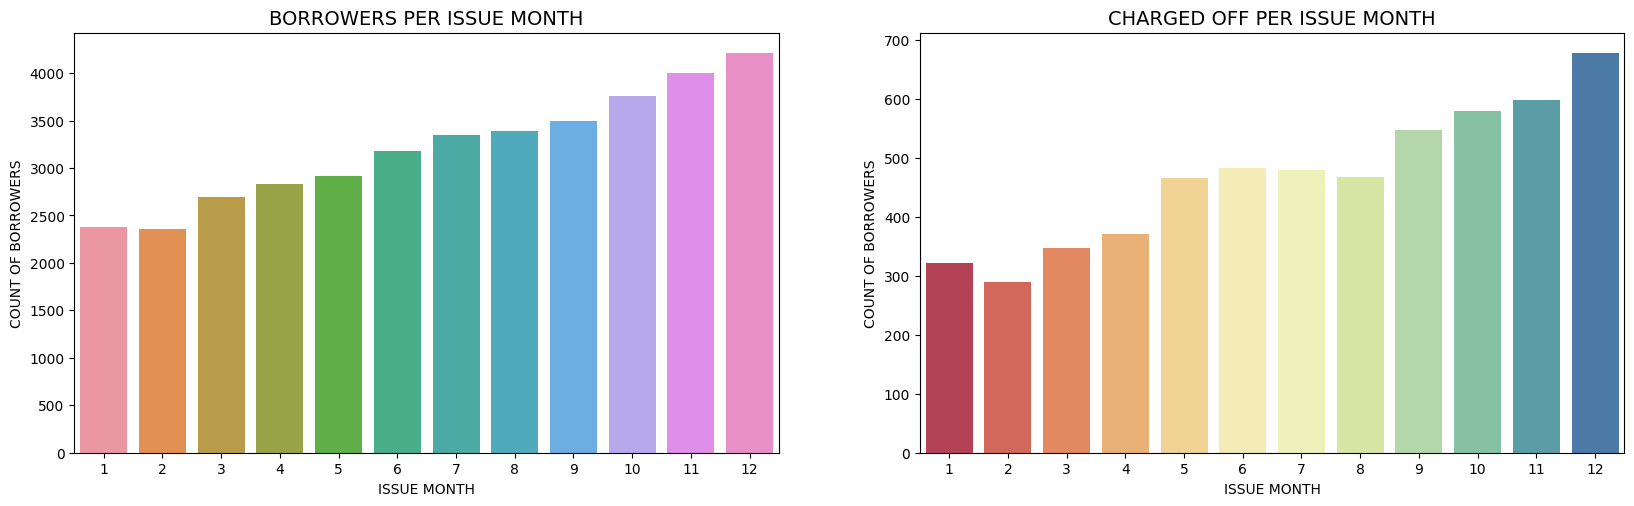

In [ ]:
df['issue_month']=df['issue_d'].dt.month #Deriving Month


# Count plot for issue month
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.countplot(x='issue_month',data=df)
viz.set_title('BORROWERS PER ISSUE MONTH',fontsize=14,color='black')
viz.set_ylabel('COUNT OF BORROWERS',fontsize =10,color = 'black')
viz.set_xlabel('ISSUE MONTH',fontsize =10,color = 'black')

# Count plot of charged off for issue month
plt.subplot(2,2,2)
viz = sns.countplot(x='issue_month',
                    palette= 'Spectral',
                    data = df[df['loan_status']=='Charged Off'])
viz.set_title('CHARGED OFF PER ISSUE MONTH',fontsize=14,color='black')
viz.set_ylabel('COUNT OF BORROWERS',fontsize =10,color = 'black')
viz.set_xlabel('ISSUE MONTH',fontsize =10,color = 'black')
plt.show()

UNIVARIATE ANALYSIS ON PURPOSE OF LOAN


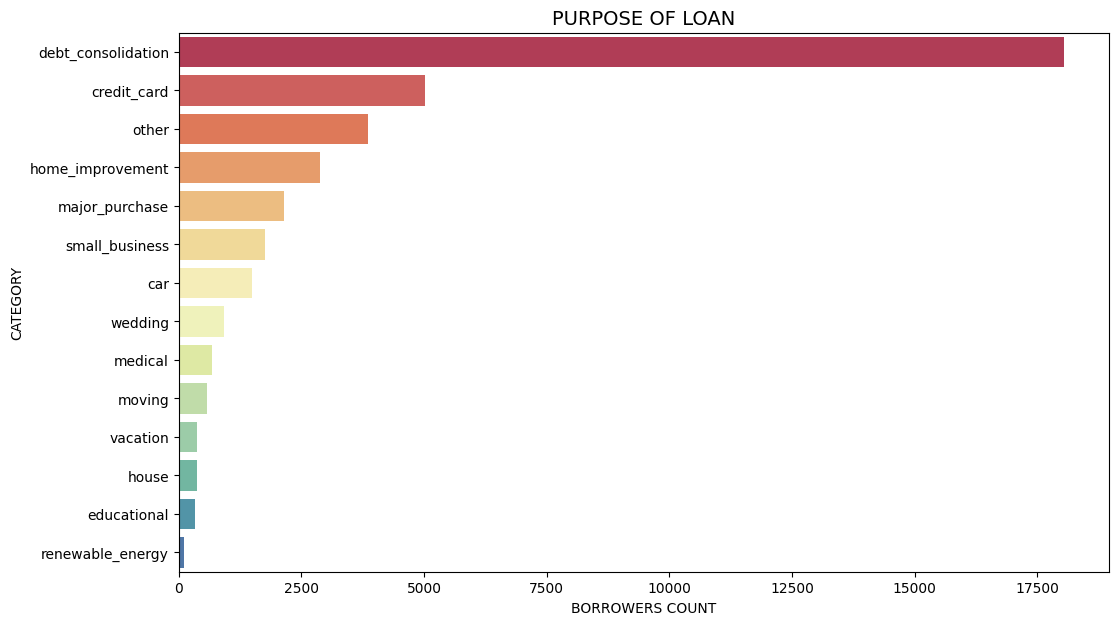

In [ ]:
# Countplot for purpose
plt.figure(figsize=(12,7))
viz = sns.countplot(y=df['purpose'],
                    order=df['purpose'].value_counts().index,
                    palette='Spectral')
viz.set_title('PURPOSE OF LOAN',fontsize=14,color='black')
viz.set_ylabel('CATEGORY',fontsize =10,color = 'black')
viz.set_xlabel('BORROWERS COUNT',fontsize =10,color = 'black')
plt.show()

# OBSERVATIONS FROM UNIVARIATE ANALYSIS
1) Most of the borrowers dont own a house.

2) There is a huge jump between 99 and 100 % of data in "annual_inc" ->
   "annual_inc" has outliers in the upper fence

3) The average interest rate is 12% but there is huge jump after 75 percentile.

4) Most of the borrowers prefer to get loan amount between 5000-15000.Most of the borrowers gets interest rate between 9% to 14%.

5) For each year number of borrowers keeps on increasing and they opt for 36 months tenure compared to 60 months.

6) Most of the borrowings happens for debt consolidation and credit card bill payment.

7) Loans approved in the months of September - December (Q4) have defaulted more than compared to the other months.

# REMOVING OUTLIERS FROM ANNUAL INCOME


In [ ]:
# Removing outliers
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]


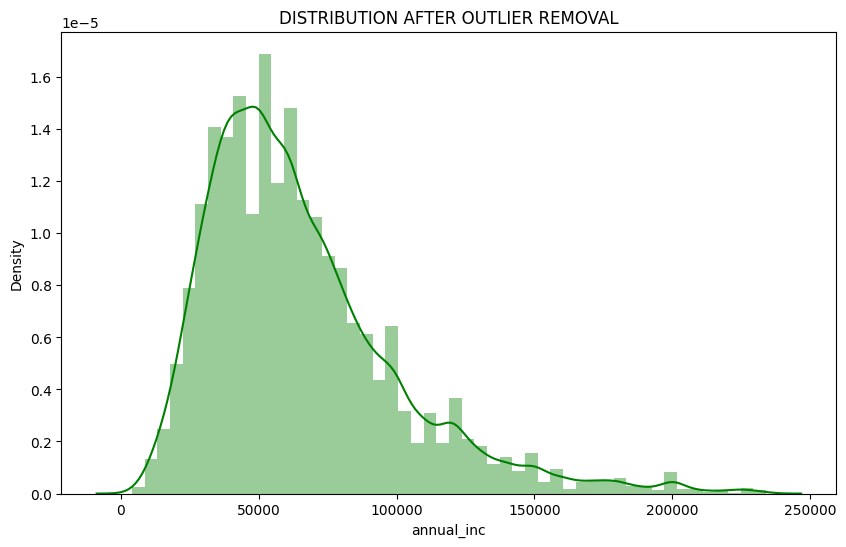

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df['annual_inc'], color='green')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()

# BIVARIATE ANALYSIS

In [ ]:
# Creating dataframe with feature value "Charged Off":
co_data = df[df['loan_status'] == 'Charged Off']

EMPLOYMENT LENGTH VS LOAN STATUS


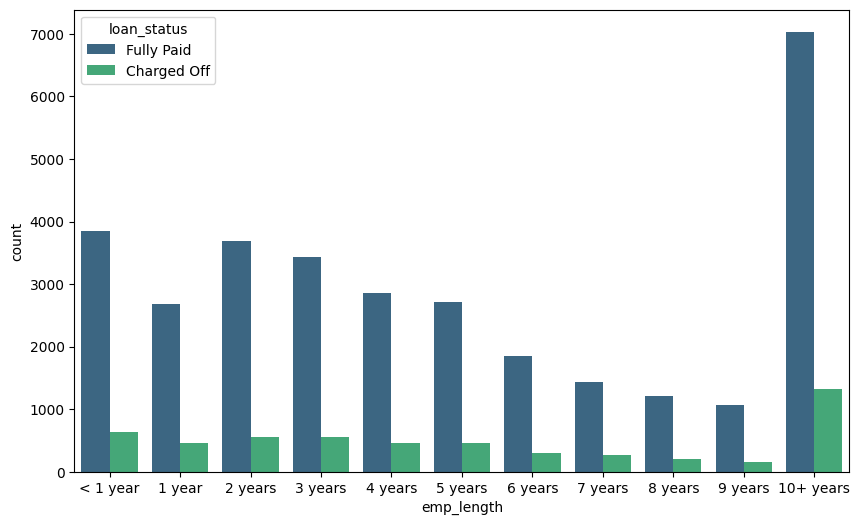

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['emp_length'],
              hue = df['loan_status'],
              order=['< 1 year',  '1 year','2 years','3 years', '4 years',
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'],
              palette='viridis',
              data = df)
plt.show()

HOME OWNERSHIP VS LOAN AMOUNT

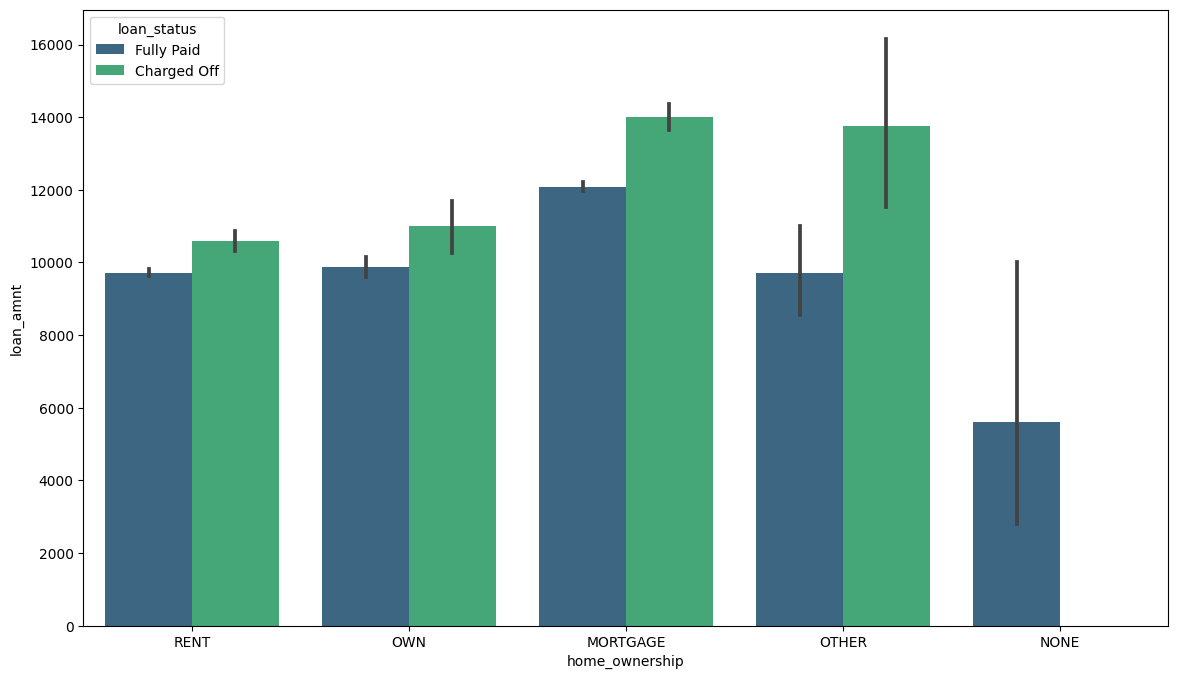

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data = df,
                 x='home_ownership',
                 y='loan_amnt',
                 hue ='loan_status',
                 palette='viridis')
plt.show()

LOAN AMOUNT VS PURPOSE

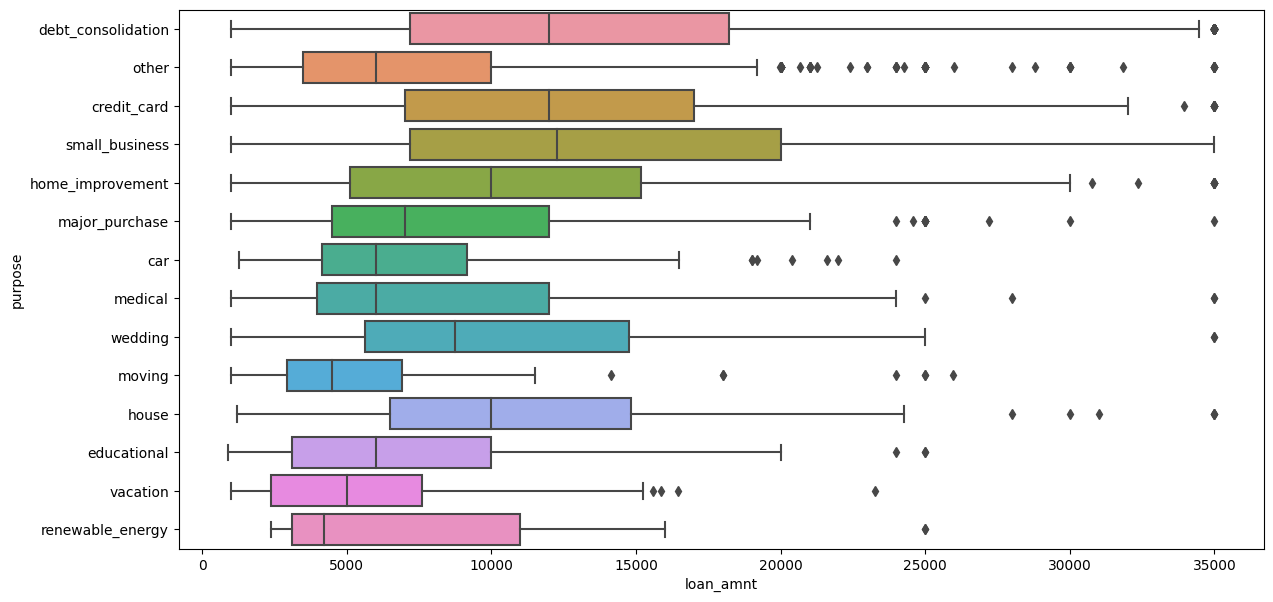

In [ ]:
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt',
            y='purpose',
            order=co_data['purpose'].value_counts().index,
            data=co_data)
plt.show()

INTEREST RATE VS PURPOSE

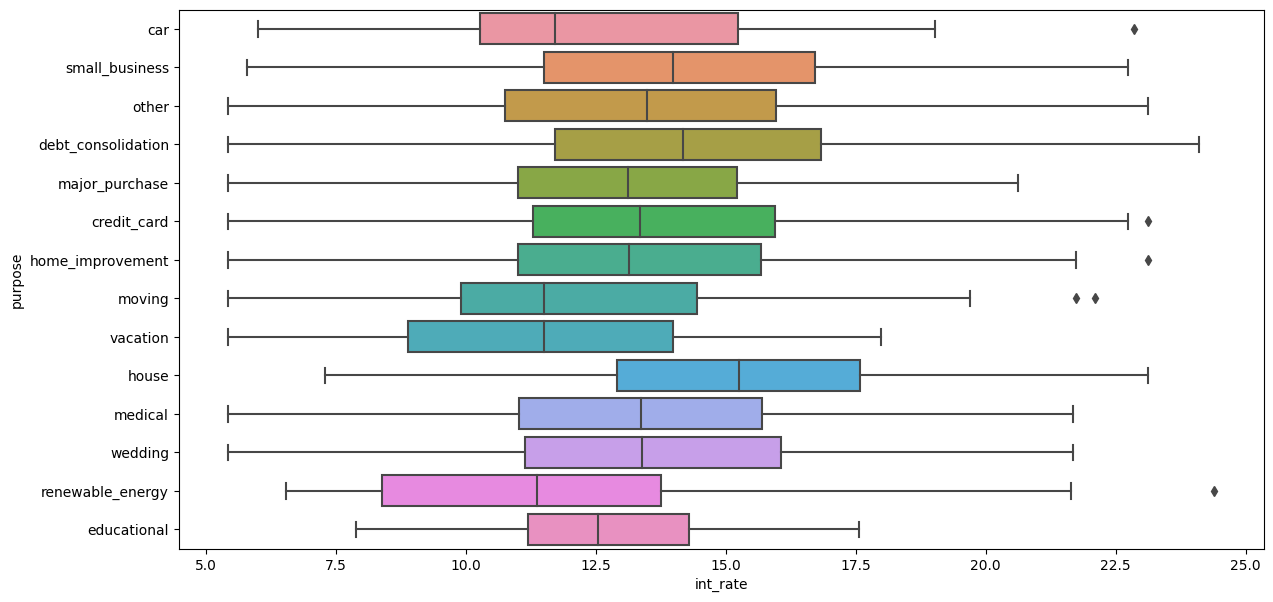

In [ ]:
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate',
            y='purpose',
            data=co_data)
plt.show()

INTEREST RATE (Default) VS TERM

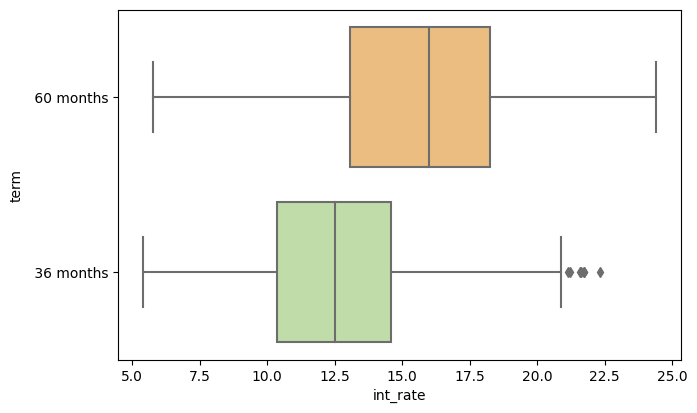

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='int_rate',
            y='term',
            palette='Spectral',
            data=co_data)
plt.show()

LOAN AMOUNT FOR PEOPLE DEFAULTING VS VERIFICATION STATUS

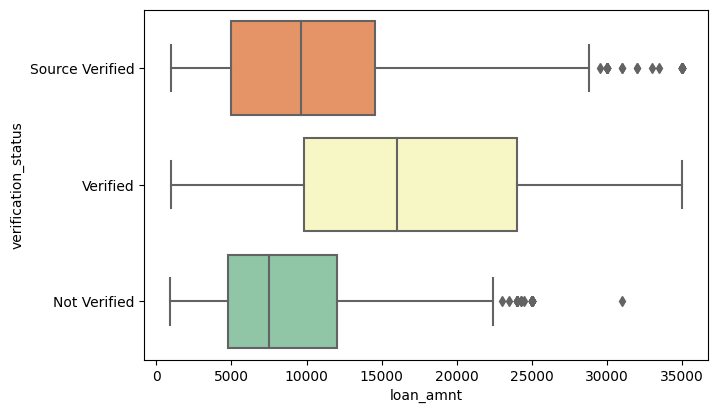

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='loan_amnt',
            y='verification_status',
            palette='Spectral',
            data=co_data)
plt.show()

LOAN AMOUNT VS GRADE

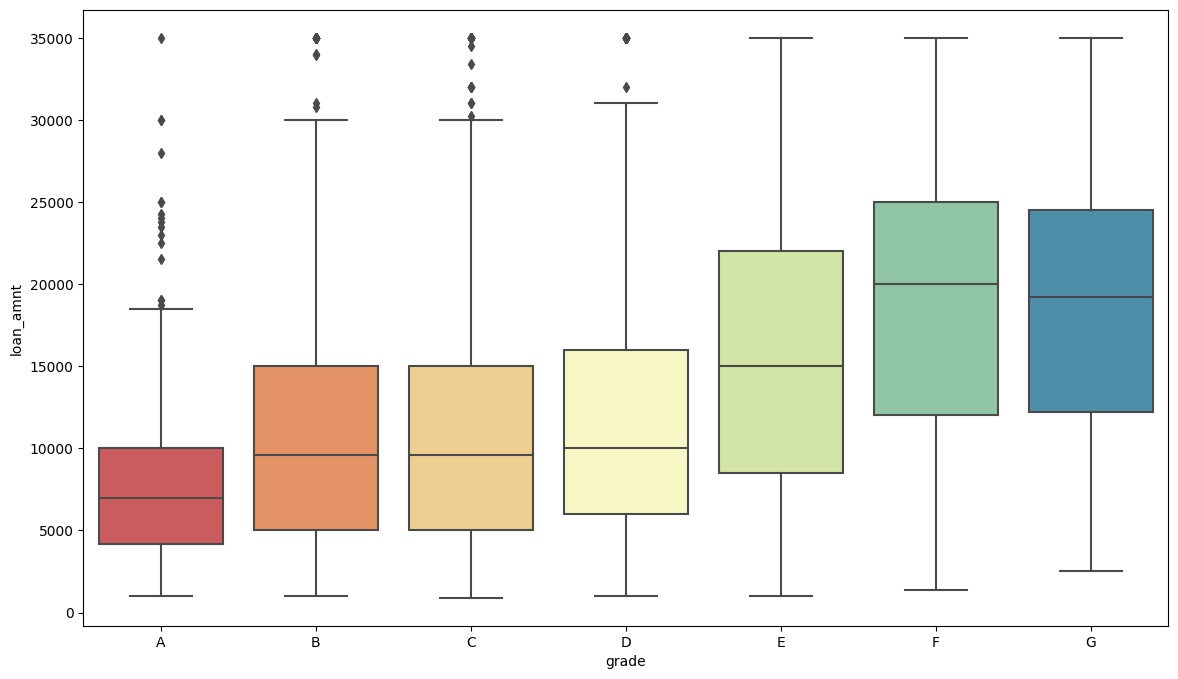

In [ ]:
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt',
            x='grade',
            order=['A','B','C','D','E','F','G'],
            palette='Spectral',
            data=co_data)
plt.show()

# OBSERVATIONS FROM BIVARIATE ANALYSIS
1) From the "EMPLOYMENT LENGHT VS LOAN STATUS" chart we can see that people who have borrowed money  with 10+ years of employment length are more likely to charge off.

2) From the "HOME OWNERSHIP VS LOAN AMOUNT" chart we can see that people living on mortgage with loan amount greater than 12k are likely to charge off.

3) From the boxplot of "LOAN AMOUNT VS PURPOSE" we can see that Loan for debt consolidation, credit card, small business with average loan amount greater than 12000 are more likely to default.

4) From the boxplot of "INTEREST RATE VS PURPOSE" we can see that Loan provided for house, debt consolidation, small business, credit care with highest interest rate are more likely to charge off.

5) From the boxplot of "INTEREST RATE VS TERM" we can see that 60 month term tenure loans with 15-20% interest rates are more likely to charge off and 36 month tenure loans with 10-15% interest rates are likely to charge off.

6) From the boxplot of "LOAN AMOUNT VS VERIFICATION STATUS" we can see that -

    i. Borrowers with verification status "not-verified" that have loan amount with 5k to 12.5k are more likely to charge off.

    ii. Borrowers with verification status "verified" that have loan amount within 10k-25k are more likely to charge off.

    iii. Borrowers with verification status "source verified" that have loan amount within 5k-15k are more likely to charge off.

7) From the boxplot of "LOAN AMOUNT VS GRADE" we can see that people from grade E,F and G with average loan amount of 15k or more are more likely to charge off.




# MULTIVARIATE ANALYSIS

CORRELATION HEATMAP

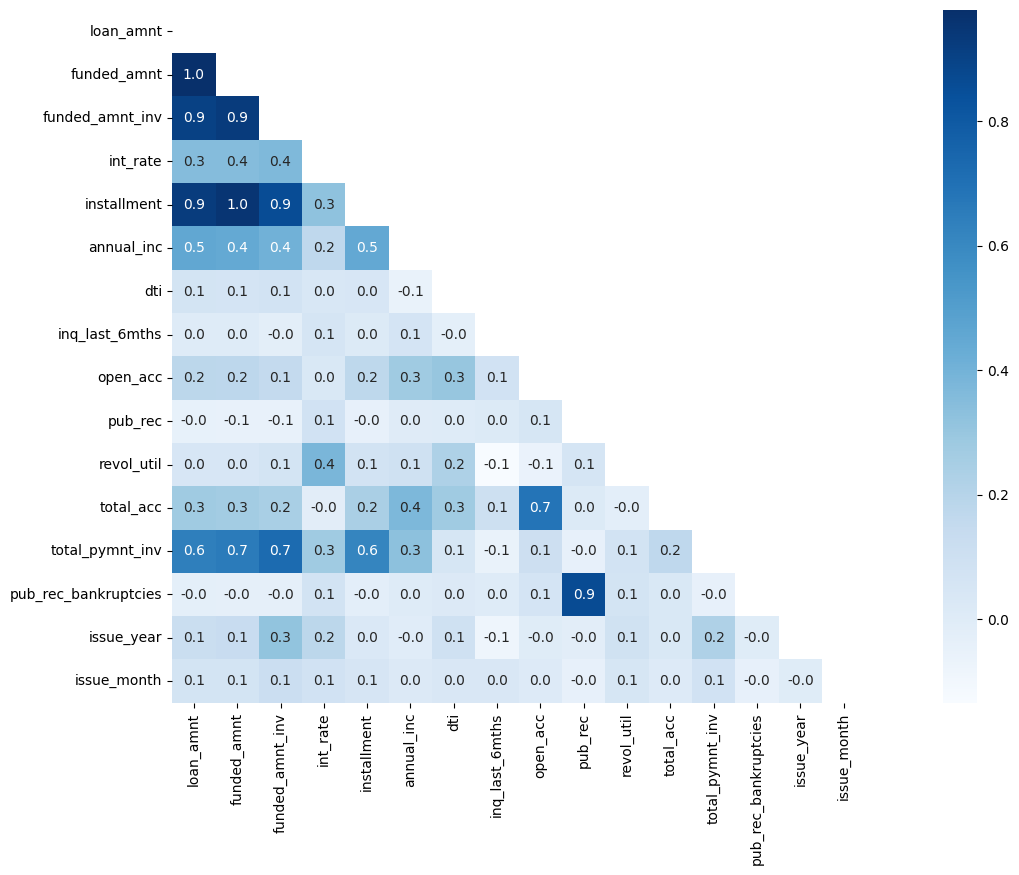

In [ ]:
plt.figure(figsize=(20,9))
correlation = co_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', mask=mask, square=True, cmap='Blues')
plt.show()

# OBSERVATIONS FROM THE CORRELATION HEAT MAP
1) 'loan_amnt' has strong positve correlation with 'installment', 'total_payment_inv'.


2) 'loan_amnt' has intermediate positive correlation with 'annual_inc', 'int_rate', 'total_acc'.


3) 'funded_amt' has strong positive correlation with 'installment'.


4) 'open_acc' has strong positive correlation with 'total_acc'. 'pub_rec' has strong positve correlation with 'pub_rec_bankruptcies'.



# OBSERVED DRIVING FACTORS FOR CHARGING OFF

1) Borrowers with a high interest rate and a long employment length (10+ years).

2) Borrowers living on mortgage with loan amount greater than 12000.

3) Loan for debt consolidation, credit card, small business with average loan amount greater than 12000

4) 60 month term tenure loans with 15-20% interest rates.

5) 36 month tenure loans with 10-15% interest rates.

6) Borrowers from grade E,F and G with average loan amount of 15000 or more.

